# Multiple linear regression

In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In this assignment, we will use data from a dataset with car data. We're going to predict the price of a car.
1. Start with reading the data and analyse the first rows

In [39]:
# import csv file to pandas df
df = pd.read_csv("cars.csv")
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [40]:
df['state'].value_counts()

owned        37723
new            438
emergency      370
Name: state, dtype: int64

2. Check for more info on the variables: nr of rows, NaN, mean etc. And delete variables of which metadata is missing.

In [41]:
df_sub=df.loc[:,'manufacturer_name':'location_region']
df_sub2=df.loc[:,'duration_listed']
df=pd.concat([df_sub,df_sub2],axis=1)
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

I ran describe, to check for strange values, which might indicate that some data is faulty. Interesting to examine a bit more are duration_listed and price_usd

In [42]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,112.826569
min,0.000000,1942.000000,0.200000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,2232.000000


3. Visualize variables which raise questions, since some of the data looks extreme. Analyse possible faulty data and drop these rows.

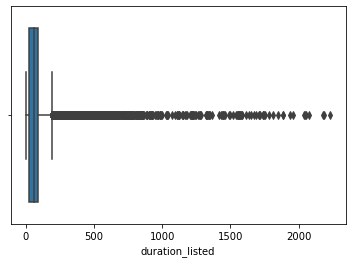

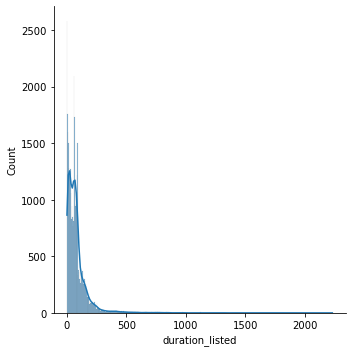

In [43]:
sns.boxplot(x='duration_listed', data=df)
plt.show()
sns.displot(x='duration_listed',kde=True, data=df)
plt.show()

Duration has many high numbers but not clear outliers.

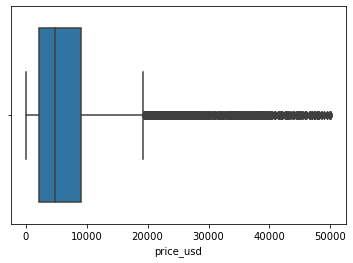

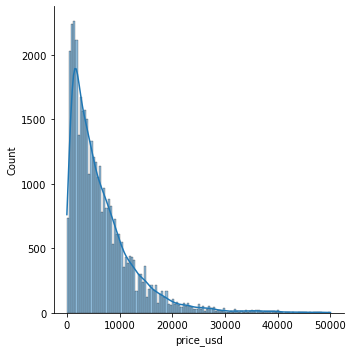

In [8]:
sns.boxplot(x='price_usd', data=df)
plt.show()
sns.displot(x='price_usd',kde=True, data=df)
plt.show()

There are 7 cars which cost less than 10 USD dollar... I pressume this is a mistake, so I decided not to includes these in the model.

In [49]:
df_select=df[df['price_usd']<500]
df_select.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,duration_listed
240,Subaru,Legacy,automatic,grey,999999,1991,gasoline,False,gasoline,2.2,universal,False,emergency,all,400.00,False,Минская обл.,62
321,LADA,111,mechanical,other,256000,1986,gasoline,False,gasoline,1.6,sedan,False,owned,rear,420.00,True,Витебская обл.,31
326,LADA,111,mechanical,red,123456,1977,gasoline,False,gasoline,1.1,sedan,False,emergency,rear,120.00,False,Гродненская обл.,2
351,LADA,111,mechanical,red,359000,1995,gasoline,False,gasoline,1.5,hatchback,False,owned,front,474.25,False,Витебская обл.,7
358,LADA,110,mechanical,other,12345,1990,gasoline,False,gasoline,1.3,sedan,False,owned,rear,400.00,True,Гомельская обл.,29


Continue with only rows with a price of more than 10 dollars

In [48]:
df_select=df[df['price_usd']>10]

## Selecting variables

By looking at the correlations between *price* and the other variables, we can decide which variables to include. 

4. Calculate the correlation of the numerical variables and also show them in a pairplot. Drop variables with very low correlations

In [11]:
corr = df_select.corr() #make correlation matrix
corr["price_usd"].sort_values(ascending=False) #take absolute value of correlations with shares_log and sort

price_usd          1.000000
year_produced      0.705447
engine_capacity    0.296619
has_warranty       0.285542
duration_listed    0.033361
is_exchangeable   -0.000625
engine_has_gas    -0.062582
odometer_value    -0.421358
Name: price_usd, dtype: float64

Let's drop the variables with a correlation below 0.25

In [12]:
df_select=df_select.drop(columns=['duration_listed','is_exchangeable','engine_has_gas'])
df_select.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,location_region
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,gasoline,2.5,universal,False,owned,all,10900.00,Минская обл.
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,gasoline,3.0,universal,False,owned,all,5000.00,Минская обл.
2,Subaru,Forester,automatic,red,402000,2001,gasoline,gasoline,2.5,suv,False,owned,all,2800.00,Минская обл.
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,gasoline,3.0,sedan,False,owned,all,9999.00,Минская обл.
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,gasoline,2.5,universal,False,owned,all,2134.11,Гомельская обл.


Check the correlations in a plot. Year_produced and odometer_value have a clear correlation with price_usd, although the correlation doesn't seem to be that lineair.

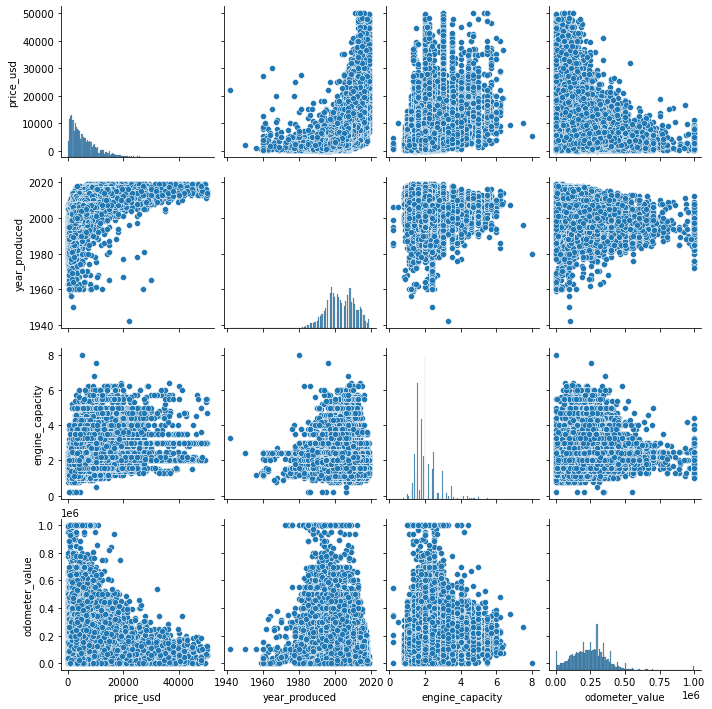

In [13]:
sns.pairplot(df_select[['price_usd','year_produced', 'engine_capacity', 'odometer_value']])
plt.show()

5. Let's include the categorical variables which probably influence the price. You will need to convert them to dummies (make sure to include the attribute drop_first= True, to prevent the dummy variable trap). First check the categories if you don't know what values they contain. Finally drop the categorical data you don't want to include.


In [14]:
df_select['state'].value_counts()

owned        37717
new            438
emergency      367
Name: state, dtype: int64

In [15]:
df_dummies = pd.get_dummies(df_select,columns=['manufacturer_name','transmission','engine_fuel','has_warranty','body_type','state'],drop_first= True)
df_dummies.head()

,model_name,color,odometer_value,year_produced,engine_type,engine_capacity,drivetrain,price_usd,location_region,manufacturer_name_Acura,...,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned
0,Outback,silver,190000,2010,gasoline,2.5,all,10900.00,Минская обл.,0,...,0,0,0,0,0,1,0,0,0,1
1,Outback,blue,290000,2002,gasoline,3.0,all,5000.00,Минская обл.,0,...,0,0,0,0,0,1,0,0,0,1
2,Forester,red,402000,2001,gasoline,2.5,all,2800.00,Минская обл.,0,...,0,0,0,0,1,0,0,0,0,1
3,Impreza,blue,10000,1999,gasoline,3.0,all,9999.00,Минская обл.,0,...,0,0,0,1,0,0,0,0,0,1
4,Legacy,black,280000,2001,gasoline,2.5,all,2134.11,Гомельская обл.,0,...,0,0,0,0,0,1,0,0,0,1


Drop all the variables we don't want to use

In [16]:
df=df_dummies.drop(columns=['model_name','color','engine_type','drivetrain','location_region'])
df.head()

,odometer_value,year_produced,engine_capacity,price_usd,manufacturer_name_Acura,manufacturer_name_Alfa Romeo,manufacturer_name_Audi,manufacturer_name_BMW,manufacturer_name_Buick,manufacturer_name_Cadillac,...,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned
0,190000,2010,2.5,10900.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,290000,2002,3.0,5000.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,402000,2001,2.5,2800.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,10000,1999,3.0,9999.00,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,280000,2001,2.5,2134.11,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [36]:
df_sub=df[['price_usd','state_emergency','state_owned','state_new']]
df_sub.corr()

,price_usd,state_emergency,state_owned,state_new
price_usd,1.000000,-0.074927,-0.177498,0.308119
state_emergency,-0.074927,1.000000,-0.671316,-0.010521
state_owned,-0.177498,-0.671316,1.000000,-0.734067
state_new,0.308119,-0.010521,-0.734067,1.000000


6. Check for NaN's and drop all rows or one or more columns if they contain a lot of NaN's

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38522 entries, 0 to 38530
Data columns (total 84 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   odometer_value                   38522 non-null  int64  
 1   year_produced                    38522 non-null  int64  
 2   engine_capacity                  38512 non-null  float64
 3   price_usd                        38522 non-null  float64
 4   manufacturer_name_Acura          38522 non-null  uint8  
 5   manufacturer_name_Alfa Romeo     38522 non-null  uint8  
 6   manufacturer_name_Audi           38522 non-null  uint8  
 7   manufacturer_name_BMW            38522 non-null  uint8  
 8   manufacturer_name_Buick          38522 non-null  uint8  
 9   manufacturer_name_Cadillac       38522 non-null  uint8  
 10  manufacturer_name_Chery          38522 non-null  uint8  
 11  manufacturer_name_Chevrolet      38522 non-null  uint8  
 12  manufacturer_name_

In [18]:
df=df.dropna()

## Fitting the model

We will split our data, train our model and then test it. 

6. Let's first create the *X* and *y* variables.

In [19]:
y = df['price_usd']
X = df.loc[:, ~df.columns.isin(['price_usd'])]
X.head()

,odometer_value,year_produced,engine_capacity,manufacturer_name_Acura,manufacturer_name_Alfa Romeo,manufacturer_name_Audi,manufacturer_name_BMW,manufacturer_name_Buick,manufacturer_name_Cadillac,manufacturer_name_Chery,...,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned
0,190000,2010,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,290000,2002,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,402000,2001,2.5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,10000,1999,3.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,280000,2001,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


7. Split the data in 70/30, 70% training set and 30% test set.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.head()

,odometer_value,year_produced,engine_capacity,manufacturer_name_Acura,manufacturer_name_Alfa Romeo,manufacturer_name_Audi,manufacturer_name_BMW,manufacturer_name_Buick,manufacturer_name_Cadillac,manufacturer_name_Chery,...,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned
9379,282000,1999,1.6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19497,210000,2005,3.6,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
31603,183000,2002,1.8,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5913,380000,1998,1.6,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
20007,390000,1999,2.5,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


8. Now let's create the model and train it. Also calculate the intercept and slopes

In [21]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

Now that the model is fitted, let's find the equation. First the intercept:

In [22]:
lm.intercept_

-882608.931451068

And the slopes: 

In [23]:
pd.DataFrame(X.columns, lm.coef_) #make a DataFrame from coefficients and variable labels

,0
-0.005938,odometer_value
445.834059,year_produced
1119.724640,engine_capacity
1197.537562,manufacturer_name_Acura
-394.325886,manufacturer_name_Alfa Romeo
...,...
-1829.334627,body_type_universal
-472.663965,body_type_van
-3819.095387,state_emergency
6500.444990,state_new


Going from the general formula of $ y = b_0 + b_1x_1 + b_2x_2 + b_3x_3 .. b_nx_n + e$, you can now create the formula, which starts with:

y = -882608 -0.005938*odometer_value+445.834059*year_produced... etc.

## Evaluating the model

9. Now let's evaluate the model's performance. We'll start by calculating the  R2 and next the RMSE

In [24]:
y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.7107891341212715

$R^2$ is 0.71, which means 71% of the variation in price can be explained by the model. Which is high!

Now we calculate the Root Mean Squared Error (RMSE).

In [25]:
math.sqrt(mean_squared_error(y_test, y_test_p))

3478.4390021021663

On average, we are by 3478 off in our predictions of prices. Let's merge y_test and X_test and add the predicted prices. 

In [26]:
df_y=pd.DataFrame(y_test)
df_y['price_usd_p']= lm.predict(X_test)
df_test=pd.concat([df_y,X_test[['odometer_value','year_produced','engine_capacity']]],axis=1)
df_test.head(10)

,price_usd,price_usd_p,odometer_value,year_produced,engine_capacity
13166,2500.00,3268.738298,260000,1998,2.0
7989,2100.00,3021.172513,205000,2001,2.0
2075,5800.00,4834.326194,400000,2000,2.5
36887,3300.00,3550.263275,250000,1998,2.0
14446,6500.00,7144.535924,256000,2010,1.5
17610,2500.00,-953.682933,999999,1996,1.9
1987,2100.00,-482.284242,327000,1994,1.6
9210,1964.24,2692.184822,500297,2000,1.9
15467,6950.00,8210.607739,500000,2002,2.5
27817,4500.00,7450.762712,300000,2002,2.0


10. Let's plot the predictions to see where our model predicts best.

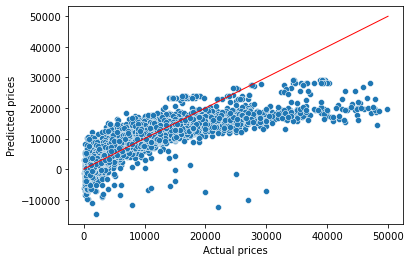

In [27]:
sns.scatterplot(x=y_test, y=y_test_p)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.plot([0,50000], [0, 50000], color='red', lw=1) #plot a diagonal length
plt.show()

The model overshoots for low number of prices and undershoots for high number of prices.

Finally, let's plot the residuals

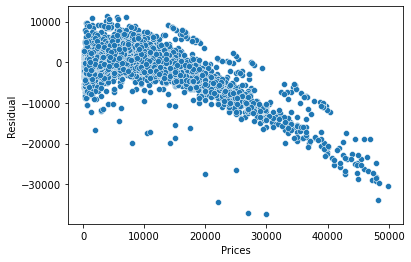

In [28]:
e=y_test_p-y_test
sns.scatterplot(x=y_test, y=e)
plt.xlabel('Prices')
plt.ylabel('Residual')
plt.show()

As could be predicted from the previous graph, the residuals are negative for low numbers of prices (model overshoots) and positive for high numbers of prices (model undershoots).

(In fact, this is just the same graph rotated 45 degrees).